In [1]:
from QAOA.qaoa_src.Ansatz import *
import scipy as sc
from qiskit.visualization import plot_histogram

In [2]:
# Generating random graph 
n = 4
rng_seed = int(np.random.randint(0,2**32-1))
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
edge_list = generate_random_graph(nodes=n,weighted=False,w_min=1e-2,seed=rng_seed)

 # tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(edge_list)


Best solution = [0 0 1 1] cost = -4.0


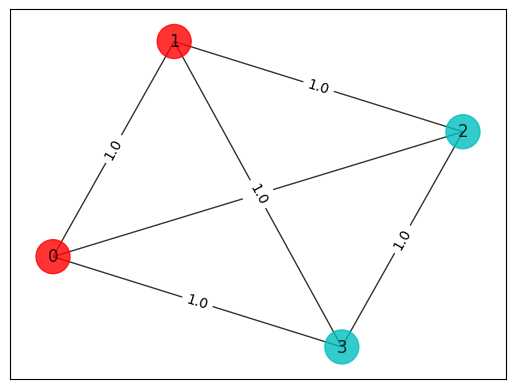

In [3]:
# Calculating optimal partition and plotting
best_cost, best_perm = qubo_min_cost_partition(nr_nodes=n,Q_mat=get_qubo(size=n,edges=edge_list))
colors = ["r" if best_perm[i] == 0 else "c" for i in range(n)]
print("\nBest solution = " + str(best_perm) + " cost = " + str(best_cost))
pos = nx.spring_layout(G)
draw_graph(G, colors, pos)


In [4]:
# Defining instance of QAOA circuit
QAOA_objective = QAOAansatz(n_qubits=n,w_edges=edge_list)

In [5]:
layers=3

theta_i = np.zeros(2*layers)
res = sc.optimize.minimize(fun=QAOA_objective.evaluate_circuit, x0=theta_i,method="Nelder-Mead")
theta_f = res.x.tolist()
res

 final_simplex: (array([[-1.01316824e-03,  1.10325764e-04, -3.25671013e-04,
         4.32236533e-04,  4.86398176e-04,  4.87423042e-04],
       [-1.04021183e-03,  1.24219543e-04, -3.02728654e-04,
         4.37444998e-04,  4.87396055e-04,  4.80121914e-04],
       [-9.57707955e-04,  9.22268302e-05, -3.28890879e-04,
         4.28750184e-04,  4.79472496e-04,  4.86822161e-04],
       [-9.50144501e-04,  1.10251859e-04, -3.52162189e-04,
         4.31945471e-04,  4.80554067e-04,  4.78069616e-04],
       [-9.35117458e-04,  9.87400272e-05, -3.39624195e-04,
         4.17035470e-04,  4.86585341e-04,  4.85027455e-04],
       [-1.02621158e-03,  7.59078814e-05, -3.07145282e-04,
         4.39531507e-04,  4.64122090e-04,  4.85564755e-04],
       [-9.52634648e-04,  7.85556983e-05, -3.12161692e-04,
         4.33911171e-04,  4.71992513e-04,  4.81758788e-04]]), array([-1.00000085, -1.00000085, -1.00000084, -1.00000083, -1.00000083,
       -1.00000083, -1.00000083]))
           fun: -1.0000008545753918
     

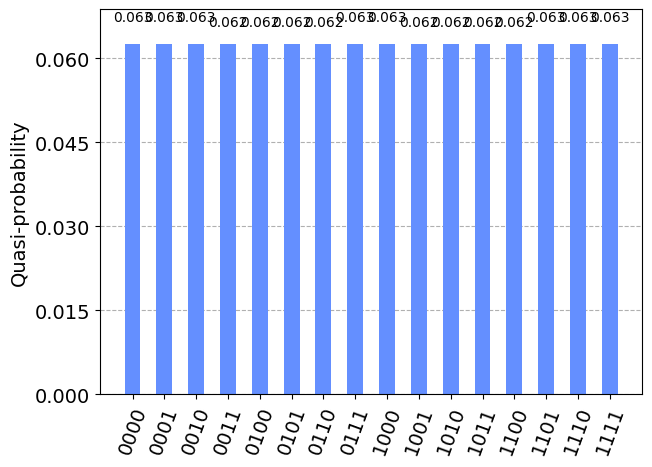

In [6]:
plot_histogram(QAOA_objective.set_circuit(theta=theta_f).get_state_probabilities())